##### Import libraries

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

##### Cleaning Initial Data

In [4]:
# Load the CSV file into a Pandas DataFrame
df_races = pd.read_csv("data/races.csv", na_values=["\\N"])

In [5]:
# Droping unnecessary columns

# List of columns to drop
columns_to_drop = [
    "fp1_date",
    "fp1_time",
    "fp2_date",
    "fp2_time",
    "fp3_date",
    "fp3_time",
    "quali_date",
    "quali_time",
    "sprint_date",
    "sprint_time",
]

# Drop the specified columns
df_races.drop(columns=columns_to_drop, axis=1, inplace=True)

In [6]:
# Convert 'date' and 'time' columns to datetime objects
df_races["date"] = pd.to_datetime(df_races["date"], errors="coerce")
df_races["time"] = pd.to_datetime(
    df_races["time"], format="%H:%M:%S", errors="coerce"
).dt.time

In [7]:
# Let's peek at the first few rows to see what it looks like!
print("First 5 rows of the dataset:")
print(df_races.head())

First 5 rows of the dataset:
   raceId  year  round  circuitId                   name       date      time  \
0       1  2009      1          1  Australian Grand Prix 2009-03-29  06:00:00   
1       2  2009      2          2   Malaysian Grand Prix 2009-04-05  09:00:00   
2       3  2009      3         17     Chinese Grand Prix 2009-04-19  07:00:00   
3       4  2009      4          3     Bahrain Grand Prix 2009-04-26  12:00:00   
4       5  2009      5          4     Spanish Grand Prix 2009-05-10  12:00:00   

                                                 url  
0  http://en.wikipedia.org/wiki/2009_Australian_G...  
1  http://en.wikipedia.org/wiki/2009_Malaysian_Gr...  
2  http://en.wikipedia.org/wiki/2009_Chinese_Gran...  
3  http://en.wikipedia.org/wiki/2009_Bahrain_Gran...  
4  http://en.wikipedia.org/wiki/2009_Spanish_Gran...  


##### Checking Data Structure and Missingness

In [8]:
# Let's get a quick summary of its structure, like data types and non-null counts
print("\nInformation about the dataset:")
df_races.info()


Information about the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1125 entries, 0 to 1124
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   raceId     1125 non-null   int64         
 1   year       1125 non-null   int64         
 2   round      1125 non-null   int64         
 3   circuitId  1125 non-null   int64         
 4   name       1125 non-null   object        
 5   date       1125 non-null   datetime64[ns]
 6   time       394 non-null    object        
 7   url        1125 non-null   object        
dtypes: datetime64[ns](1), int64(4), object(3)
memory usage: 70.4+ KB


In [9]:
# Let's check the number of missing values
print("\nNumber of missing values per column:")
print(df_races.isnull().sum())


Number of missing values per column:
raceId         0
year           0
round          0
circuitId      0
name           0
date           0
time         731
url            0
dtype: int64


##### Checking and Correcting Possible Inconsistent Data

In [10]:
# Check unique values and their counts for the 'name' column
print("Unique values and their counts in the 'name' column:")
print(df_races["name"].value_counts())

Unique values and their counts in the 'name' column:
name
Italian Grand Prix               75
British Grand Prix               75
Monaco Grand Prix                70
Belgian Grand Prix               69
German Grand Prix                64
French Grand Prix                62
Spanish Grand Prix               54
Canadian Grand Prix              53
Brazilian Grand Prix             47
United States Grand Prix         45
Hungarian Grand Prix             39
Japanese Grand Prix              38
Australian Grand Prix            38
Austrian Grand Prix              37
Dutch Grand Prix                 34
San Marino Grand Prix            26
European Grand Prix              23
South African Grand Prix         23
Argentine Grand Prix             20
Mexican Grand Prix               20
Bahrain Grand Prix               20
Malaysian Grand Prix             19
Portuguese Grand Prix            18
Chinese Grand Prix               17
Abu Dhabi Grand Prix             16
Singapore Grand Prix             15
Indian

In [11]:
# Get descriptive statistics for the 'year' and 'round' columns
print("Descriptive statistics for 'year' column:")
print(df_races["year"].describe())

print("\nDescriptive statistics for 'round' column:")
print(df_races["round"].describe())

Descriptive statistics for 'year' column:
count    1125.000000
mean     1992.703111
std        20.603848
min      1950.000000
25%      1977.000000
50%      1994.000000
75%      2011.000000
max      2024.000000
Name: year, dtype: float64

Descriptive statistics for 'round' column:
count    1125.000000
mean        8.579556
std         5.159910
min         1.000000
25%         4.000000
50%         8.000000
75%        13.000000
max        24.000000
Name: round, dtype: float64


##### Exploratory Data Analysis (EDA) and Visualization

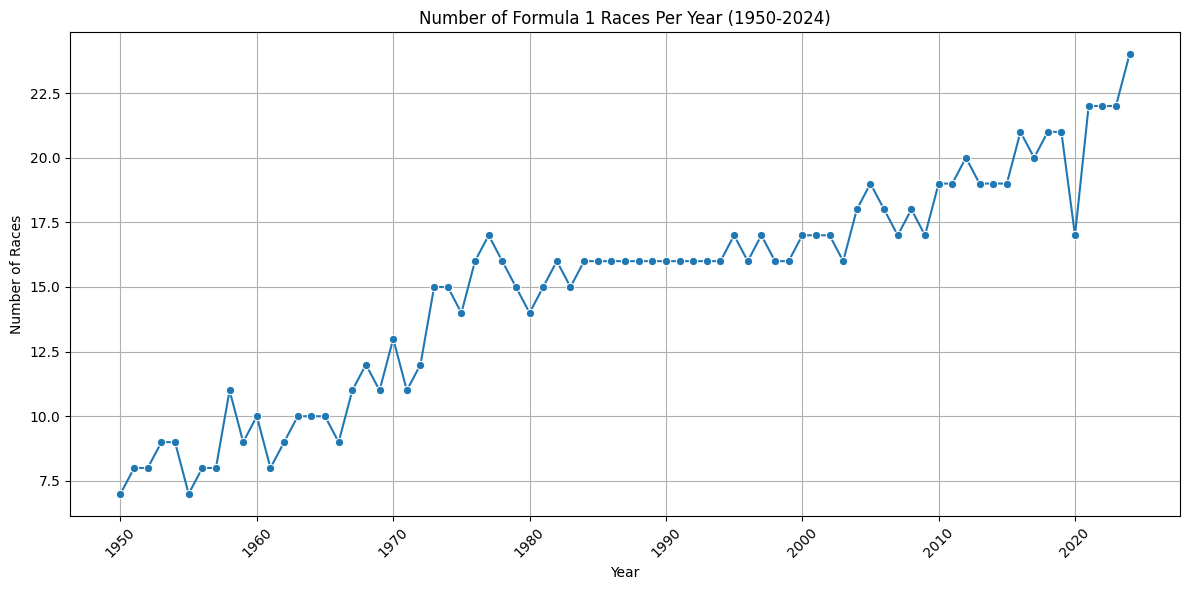

In [12]:
# Count the number of races per year
races_per_year = df_races["year"].value_counts().sort_index()

# Create the line plot
plt.figure(figsize=(12, 6))  # Set the size of the plot
sns.lineplot(x=races_per_year.index, y=races_per_year.values, marker="o")

# Create the line plot
plt.title("Number of Formula 1 Races Per Year (1950-2024)")  # Add a title
plt.xlabel("Year")  # Label the x-axis
plt.ylabel("Number of Races")  # Label the y-axis
plt.grid(True)  # Add a grid for readability
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability if many years
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()  # Display the plot

In [13]:
# Load the circuits.csv file
df_circuits = pd.read_csv("data/circuits.csv")

# Mapping for short country names to long names
country_name_map = {
    "USA": "United States",
    "UK": "United Kingdom",
    "UAE": "United Arab Emirates",
}

# Replace short names with long names in the 'country' column
df_circuits["country"] = df_circuits["country"].replace(country_name_map)

In [14]:
# Select relevant columns from df_circuits and rename 'name' to 'circuitName'
df_circuits_slim = df_circuits[["circuitId", "name", "country"]].rename(
    columns={"name": "circuitName"}
)

# Merge df_races with df_circuits_slim on 'circuitId'
df_races_merged = pd.merge(
    df_races,
    df_circuits_slim,
    on="circuitId",
    how="left",
)

Generate Bar Charts with Names:

In [15]:
# Directory for saving figures
import os

os.makedirs("figures", exist_ok=True)

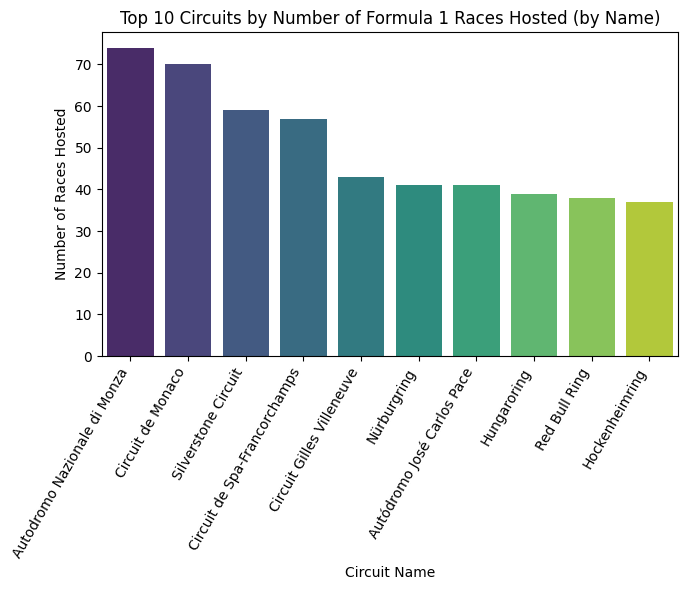

In [25]:
# Count the number of races per circuitName from the merged DataFrame
races_per_circuit = (
    df_races_merged["circuitName"].value_counts().head(10).sort_values(ascending=False)
)

# Create the bar chart
plt.figure(figsize=(7, 6))  # Slightly larger figure for readability
sns.barplot(
    x=races_per_circuit.index,
    y=races_per_circuit.values,
    hue=races_per_circuit.index,
    palette="viridis",
)
plt.title("Top 10 Circuits by Number of Formula 1 Races Hosted (by Name)")
plt.xlabel("Circuit Name")
plt.ylabel("Number of Races Hosted")
plt.xticks(rotation=60, ha="right")  # Rotate labels more for long names
plt.tight_layout()
plt.savefig("figures/top_circuits_by_name_bar_chart.png")  # Save the plot to a file
plt.show()

In [17]:
# Filter for Non-European Circuits

# List of European countries
european_countries = [
    "Austria",
    "Belgium",
    "France",
    "Germany",
    "Hungary",
    "Italy",
    "Monaco",
    "Netherlands",
    "Portugal",
    "Spain",
    "Sweden",
    "Switzerland",
    "United Kingdom",
]

# Filter out European races
df_non_european_races = df_races_merged[
    ~df_races_merged["country"].isin(european_countries)
]

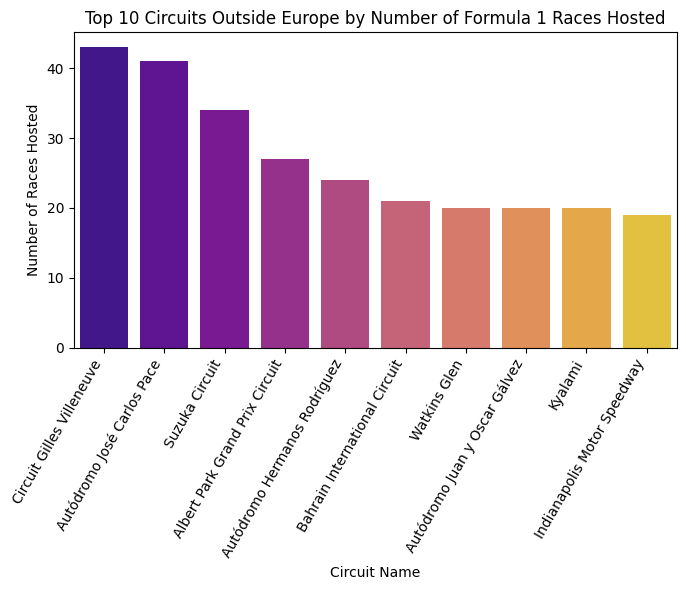

In [24]:
# Count and Plot Top Non-European Circuits

# Count the number of races per circuitName from the filtered DataFrame
races_per_non_european_circuit = (
    df_non_european_races["circuitName"]
    .value_counts()
    .head(10)
    .sort_values(ascending=False)
)

# Create the bar chart for non-European circuits
plt.figure(figsize=(7, 6))  # Slightly larger figure for readability
sns.barplot(
    x=races_per_non_european_circuit.index,
    y=races_per_non_european_circuit.values,
    hue=races_per_non_european_circuit.index,
    palette="plasma",
)
plt.title("Top 10 Circuits Outside Europe by Number of Formula 1 Races Hosted")
plt.xlabel("Circuit Name")
plt.ylabel("Number of Races Hosted")
plt.xticks(rotation=60, ha="right")  # Rotate labels more for long names
plt.tight_layout()
plt.savefig(
    "figures/top_non_european_circuits_bar_chart.png"
)  # Save the plot to a file
plt.show()